In [11]:

import os

import pickle
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [12]:
log_dir = "../logs/cifar10/2025-09-11_23-55-53"
dim_ds = 3072

In [13]:
# --- Reading emb_acc.pkl ---
try:
    with open(os.path.join(log_dir, "emb_acc.pkl"), "rb") as f:
        acc_test_large, acc_test_med, acc_test_low, acc_test_verylow = pickle.load(f)
    print("Data loaded successfully from emb_acc.pkl:")
    print(f"acc_test_large: {acc_test_large}")
    print(f"acc_test_med: {acc_test_med}")
    print(f"acc_test_low: {acc_test_low}")
    print(f"acc_test_verylow: {acc_test_verylow}")
    print("-" * 30)
except FileNotFoundError:
    print(f"Error: emb_acc.pkl not found in {log_dir}. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading emb_acc.pkl: {e}")

# --- Reading base_acc.pkl ---
try:
    with open(os.path.join(log_dir, "base_acc.pkl"), "rb") as f:
        model_large_acc, model_med_acc, model_low_acc, model_verylow_acc = pickle.load(f)
    print("Data loaded successfully from base_acc.pkl:")
    print(f"model_large_acc: {model_large_acc}")
    print(f"model_med_acc: {model_med_acc}")
    print(f"model_low_acc: {model_low_acc}")
    print(f"model_verylow_acc: {model_verylow_acc}")
    print("-" * 30)
except FileNotFoundError:
    print(f"Error: base_acc.pkl not found in {log_dir}. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading base_acc.pkl: {e}")

# --- Reading train_time.pkl ---
try:
    with open(os.path.join(log_dir, "train_time.pkl"), "rb") as f:
        base_time_train, emb_time_train = pickle.load(f)
    print("Data loaded successfully from train_time.pkl:")
    print(f"base_time_train: {base_time_train}")
    print(f"emb_time_train: {emb_time_train}")
    print("-" * 30)
except FileNotFoundError:
    print(f"Error: train_time.pkl not found in {log_dir}. Please check the path.")
except Exception as e:
    print(f"An error occurred while reading train_time.pkl: {e}")

Data loaded successfully from emb_acc.pkl:
acc_test_large: [np.float64(0.1614), np.float64(0.2156), np.float64(0.2643), np.float64(0.3056), np.float64(0.3141), np.float64(0.335), np.float64(0.3614), np.float64(0.3699), np.float64(0.395), np.float64(0.3966), np.float64(0.4154), np.float64(0.422), np.float64(0.4327), np.float64(0.4473), np.float64(0.4451), np.float64(0.4562), np.float64(0.4701), np.float64(0.4775), np.float64(0.4943), np.float64(0.4962), np.float64(0.5), np.float64(0.4957), np.float64(0.4998), np.float64(0.4991), np.float64(0.5123), np.float64(0.5174), np.float64(0.5253), np.float64(0.531), np.float64(0.5297), np.float64(0.529), np.float64(0.5314), np.float64(0.5377), np.float64(0.5336), np.float64(0.536), np.float64(0.5398), np.float64(0.5357), np.float64(0.5411), np.float64(0.546), np.float64(0.5431), np.float64(0.5454), np.float64(0.5408), np.float64(0.5425), np.float64(0.5446), np.float64(0.5435), np.float64(0.5447), np.float64(0.5447), np.float64(0.5417), np.float64

In [14]:
index = []
ticks = []
index_time = []
model_base = []
model_med_base = []
model_low_base = []
model_verylow_base = []
time_base_large = []
time_base_med = []
time_base_low = []
time_base_verylow = []


for i in range(len(acc_test_large)-1):
    if(i %5 == 0):
        if(len(acc_test_large) - i < 5):
            index.append(" ")
        else:
            index.append(i + 1)
    else:
        index.append(" ")
    ticks.append(i)

    if(i % 10 == 0):
        if(len(acc_test_large) - i < 9):
            index_time.append(" ")
        else:
            index_time.append(i + 1)
    else:
        index_time.append(" ")
ticks.append(len(acc_test_large)-1)
index.append(len(acc_test_large))
index.append(" ")
index.append(" ")
index.append("...")
index.append(" ")
index.append(" ")
index.append(dim_ds)


index_time.append("...")
index_time.append(" ")
index_time.append(" ")
index_time.append(" ")
index_time.append(" ")
index_time.append(" ")
index_time.append(dim_ds)
for i in range(len(acc_test_large), len(acc_test_large) + 6):
    ticks.append(i)

for i in range(len(acc_test_large) + 6):
    model_base.append(model_large_acc)
    model_med_base.append(model_med_acc)
    model_low_base.append(model_low_acc)
    model_verylow_base.append(model_verylow_acc)
    time_base_large.append(base_time_train[0])
    time_base_med.append(base_time_train[1])
    time_base_low.append(base_time_train[2])
    time_base_verylow.append(base_time_train[3])

#Time preprocessing

time_large = []
time_med = []
time_low = []
time_verylow = []

for i in range(len(acc_test_large)):
    time_large.append(emb_time_train[4 * i])
    time_med.append(emb_time_train[4 * i + 1])
    time_low.append(emb_time_train[4 * i + 2])
    time_verylow.append(emb_time_train[4 * i + 3])

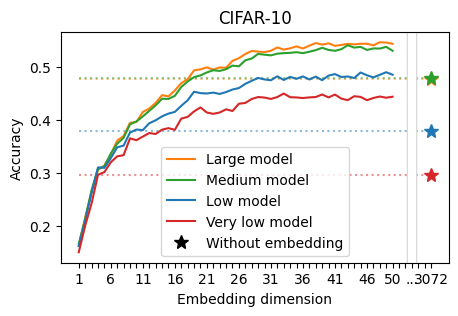

In [15]:
# summarize history for accuracy
import matplotlib.lines as mlines

plt.figure(figsize=(5,3))
plt.plot(model_base, color=('tab:orange', 0.5), ls=':')
plt.plot(model_med_base, color=('tab:green', 0.5), ls=':')
plt.plot(model_low_base, color=('tab:blue', 0.5), ls=':')
plt.plot(model_verylow_base, color=('tab:red',0.5), ls=':')

plt.plot(len(acc_test_large) + 5, model_large_acc, marker='*', color='tab:orange', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_med) + 5, model_med_acc, marker='*', color='tab:green', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_low) + 5, model_low_acc, marker='*', color='tab:blue', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_verylow) + 5, model_verylow_acc, marker='*', color='tab:red', markersize=10, linestyle='None', label='_nolegend_')

plt.plot(acc_test_large, label='Large model', color='tab:orange', ls='-')
plt.plot(acc_test_med, label='Medium model', color='tab:green', ls='-')
plt.plot(acc_test_low, label='Low model', color='tab:blue', ls='-')
plt.plot(acc_test_verylow, label='Very low model', color='tab:red', ls='-')



plt.axvline(len(acc_test_large) + 2, color='lightgrey', linestyle='-', linewidth=7.5)
plt.axvline(len(acc_test_large) + 2, color='white', linestyle='-', linewidth=6)

black_star_proxy = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                 markersize=10, label='Without embedding')

plt.title('CIFAR-10')
plt.ylabel('Accuracy')
plt.xlabel('Embedding dimension')
plt.xticks(ticks, index)

handles, labels = plt.gca().get_legend_handles_labels()
handles.append(black_star_proxy)

plt.legend(handles=handles)
plt.savefig('../figures/cifar10_accuracy_full_pp.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('../figures/cifar10_accuracy_full_pp.png', bbox_inches='tight', dpi=2000)

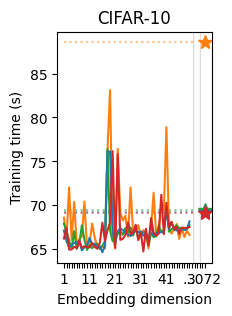

In [16]:
#Plot training time


plt.figure(figsize=(2,3))
plt.plot(time_base_large, color=('tab:orange', 0.5), ls=':')
plt.plot(time_base_med, color=('tab:green', 0.5), ls=':')
plt.plot(time_base_low, color=('tab:blue', 0.5), ls=':')
plt.plot(time_base_verylow, color=('tab:red',0.5), ls=':')


plt.plot(time_large, label='Large model', color='tab:orange', ls='-')
plt.plot(time_med, label='Medium model', color='tab:green', ls='-')
plt.plot(time_low, label='Low model', color='tab:blue', ls='-')
plt.plot(time_verylow, label='Very low model', color='tab:red', ls='-')


plt.axvline(len(acc_test_large) + 2, color='lightgrey', linestyle='-', linewidth=5.5)
plt.axvline(len(acc_test_large) + 2, color='white', linestyle='-', linewidth=4)

black_star_proxy = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                 markersize=10, label='Without embedding')

plt.plot(len(acc_test_large) + 5, base_time_train[0], marker='*', color='tab:orange', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_med) + 5, base_time_train[1], marker='*', color='tab:green', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_low) + 5, base_time_train[2], marker='*', color='tab:blue', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(acc_test_verylow) + 5, base_time_train[3], marker='*', color='tab:red', markersize=10, linestyle='None', label='_nolegend_')

plt.title('CIFAR-10')
plt.ylabel('Training time (s)')
plt.xlabel('Embedding dimension')
plt.xticks(ticks, index_time)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(black_star_proxy)

#plt.legend(handles=handles)
plt.savefig('../figures/training_time_cifar10_accuracy_full.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('../figures/training_time_cifar10_accuracy_full.png', bbox_inches='tight', dpi=2000)

In [17]:
def blocks_means(list, x):
    means = []
    intervalles = []

    for i in range(0, len(list), x):
        bloc = list[i:i + x]
        mean = sum(bloc) / len(bloc)
        means.append(mean)

        beg = i + 1
        end = i + len(bloc)
        intervalles.append(f"{beg}-{end}")

    return means, intervalles

In [18]:
blocks_size = 10

cond_time_large, index_cond = blocks_means(time_large, blocks_size)
cond_time_med, index_cond = blocks_means(time_med, blocks_size)
cond_time_low, index_cond = blocks_means(time_low, blocks_size)
cond_time_verylow, index_cond = blocks_means(time_verylow, blocks_size)

print(cond_time_med)
print(index_cond)




[66.2617939710617, 66.75967400074005, 66.9453516960144, 66.774875664711, 67.6259079694748]
['1-10', '11-20', '21-30', '31-40', '41-50']


In [19]:
index = []
ticks = []


for i in range(len(index_cond) + 2):
    ticks.append(i)
for i in range(len(index_cond)):
    index.append(index_cond[i])

index.append("...")
index.append(dim_ds)
#Time preprocessing

time_base_large = []
time_base_med = []
time_base_low = []
time_base_verylow = []

for i in range(len(index_cond) + 2):
    time_base_large.append(base_time_train[0])
    time_base_med.append(base_time_train[1])
    time_base_low.append(base_time_train[2])
    time_base_verylow.append(base_time_train[3])

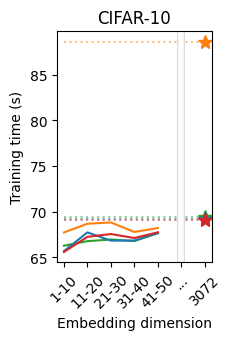

In [20]:
#Plot training time


plt.figure(figsize=(2,3))
plt.plot(time_base_large, color=('tab:orange', 0.5), ls=':')
plt.plot(time_base_med, color=('tab:green', 0.5), ls=':')
plt.plot(time_base_low, color=('tab:blue', 0.5), ls=':')
plt.plot(time_base_verylow, color=('tab:red',0.5), ls=':')


plt.plot(cond_time_large, label='Large model', color='tab:orange', ls='-')
plt.plot(cond_time_med, label='Medium model', color='tab:green', ls='-')
plt.plot(cond_time_low, label='Low model', color='tab:blue', ls='-')
plt.plot(cond_time_verylow, label='Very low model', color='tab:red', ls='-')


plt.axvline(len(index_cond), color='lightgrey', linestyle='-', linewidth=5.5)
plt.axvline(len(index_cond), color='white', linestyle='-', linewidth=4)

black_star_proxy = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                 markersize=10, label='Training time without embedding')

plt.plot(len(index_cond) + 1, base_time_train[0], marker='*', color='tab:orange', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(index_cond) + 1, base_time_train[1], marker='*', color='tab:green', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(index_cond) + 1, base_time_train[2], marker='*', color='tab:blue', markersize=10, linestyle='None', label='_nolegend_')
plt.plot(len(index_cond) + 1, base_time_train[3], marker='*', color='tab:red', markersize=10, linestyle='None', label='_nolegend_')

plt.title('CIFAR-10')
plt.ylabel('Training time (s)')
plt.xlabel('Embedding dimension')
plt.xticks(ticks, index, rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(black_star_proxy)

#plt.legend(handles=handles)
plt.savefig('../figures/cond_training_time_cifar10_accuracy_full.pgf', bbox_inches='tight', dpi=4000)
plt.savefig('../figures/cond_training_time_cifar10_accuracy_full.png', bbox_inches='tight', dpi=2000)